In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import json


In [2]:


#df_covid_current_states=pd.read_csv('https://covidtracking.com/api/v1/states/current.csv')
#df_covid_current_states_updated=df_covid_current_states[['state','positive',]]
#print(df_covid_current_states.head())
#df_state_geo = pd.read_csv('https://raw.githubusercontent.com/kelvins/US-Cities-Database/master/csv/us_cities.csv')
#print(df_state_geo.head())
data_json=requests.get(url = 'https://www.trackcorona.live/api/cities').json()
df_states = pd.read_json(json.dumps(data_json['data']))
print(df_states)
df_states_needed = df_states[['latitude','longitude','confirmed','dead', 'recovered']]
#df_states_needed = df_states[['latitude','longitude','confirmed']]
#df_covid_current_states = pd.read_json(d)
df_states_needed.head()

                                location country_code   latitude   longitude  \
0                                Zamfara           ng  12.122181    6.223582   
1                            Bergen (L.)           nl  51.579024    6.077424   
2                            Pilõezinhos           br  -6.843131  -35.530578   
3                                Pavussu           br  -7.964325  -43.224345   
4                                 Anshun           cn  26.253088  105.947595   
...                                  ...          ...        ...         ...   
9892      Harnett County, North Carolina           us  35.357865  -78.883555   
9893           Jones County, Mississippi           us  31.534324  -89.170600   
9894  Northampton County, North Carolina           us  36.415963  -77.424297   
9895       Somerset County, Pennsylvania           us  40.022493  -78.928824   
9896    Fairfield County, South Carolina           us  34.447835  -81.075466   

      confirmed  dead  recovered  veloc

,latitude,longitude,confirmed,dead,recovered
0,12.122181,6.223582,77,5.0,71.0
1,51.579024,6.077424,0,0.0,NaN
2,-6.843131,-35.530578,87,0.0,NaN
3,-7.964325,-43.224345,2,1.0,NaN
4,26.253088,105.947595,4,0.0,4.0


In [10]:
from sklearn.model_selection import train_test_split
X=df_states_needed[['latitude','longitude']]
#y=df_states_needed['confirmed']
y=df_states_needed[['confirmed','dead','recovered']].fillna(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7917, 2)
(1980, 2)


The covid confirmed today near to my home address is  [[1401.42857143   19.21428571    0.        ]]
The MSE is: 16362603.157912461   1
The MSE is: 14802799.757220037   2
The MSE is: 13782789.169416957   3
The MSE is: 13517626.29621289   4
The MSE is: 13192476.056177406   5
The MSE is: 13184292.980552413   6
The MSE is: 13249531.73755174   7
The MSE is: 13270786.40924591   8
The MSE is: 13086737.2507041   9
The MSE is: 13092711.663716773   10
The MSE is: 13067916.28574113   11
The MSE is: 13080380.155449035   12
The MSE is: 13084677.759577168   13
The MSE is: 13033684.320509234   14
The MSE is: 13037217.224278966   15
The MSE is: 13039041.10736697   16
The MSE is: 13045643.23012128   17
The MSE is: 13061242.066514872   18
The MSE is: 13081614.245953863   19


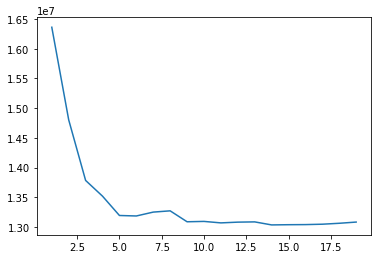

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
knnr = KNeighborsRegressor(n_neighbors = 14)
knnr.fit(X_train, y_train)
a=[]
c=[]
for n_value in  range(1,20):
    knnr = KNeighborsRegressor(n_neighbors = n_value,weights='distance',p=2)
    knnr.fit(X_train, y_train)
    a.append(n_value)
    #plt.scatter(x=n_value,y=format(np.power(y_test-knnr.predict(X_test),2).mean()),s=60,c='red')
    print ("The MSE is:",mean_squared_error(y_test,knnr.predict(X_test))," ",n_value)
    c.append(mean_squared_error(y_test,knnr.predict(X_test)))
plt.plot(a,c)
plt.show()

In [12]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knnr = KNeighborsRegressor()
model = GridSearchCV(knnr, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


{'n_neighbors': 11}

In [61]:
#addressSearch = "277 communipaw ave jersey city new jersey 07205"
#addressSearch = "South Toe, NC 28714"
#addressSearch = "1255 E University Dr. Tempe | AZ 85281-4950"
#addressSearch = "balaji place cary"
#addressSearch = "green gables heritage place"
#addressSearch = "3170 bethel road columbus ohio"
#addressSearch = "2572 crescent view drive"
#addressSearch = "navaho arizona"
#addressSearch = "point loma san diego"
addressSearch = "murphy NC"

from sklearn.neighbors import KNeighborsRegressor
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="addresscodingLatLong")
location = geolocator.geocode(addressSearch)
knnr = KNeighborsRegressor(n_neighbors = 11)
knnr.fit(X_train, y_train)
print(location.latitude,location.longitude)
covid_prediction=knnr.predict([[location.latitude,location.longitude]])
print("Todays covid confirmed index based on your location is - ", round(covid_prediction[0][0]))
print("Todays covid deaths index based on your location is - ", round(covid_prediction[0][1]))
#print("Todays covid recovery index based on your location is - ", round(covid_prediction[0][2]))

confirmed_numbers=arr = df_states_needed['confirmed'].to_numpy()[df_states_needed['confirmed'].to_numpy() != 0]
redvalue=np.percentile(confirmed_numbers, 95)
yellowvalue=np.percentile(confirmed_numbers, 75)
greenvalue=np.percentile(confirmed_numbers, 55)

def returnZone(covid_prediction):
    if covid_prediction>redvalue:
        return "Red Zone"
    elif covid_prediction>yellowvalue:
        return "Yellow Zone"
    else:
        return "Green Zone"



print("You are in a ", returnZone(covid_prediction[0][0]))

35.0875836 -84.0346315
Todays covid confirmed index based on your location is -  285
Todays covid deaths index based on your location is -  4
You are in a  Green Zone
